 Fundamental of Data Assignment deadline date 29 November 2019 HDip in Data Analytics

By Catherine Ann Celeste Quinlan Student number :

#### **Tips data set**

In [10]:
# %matplotlib inline 
# allows the plots to be inside the notebook
import matplotlib as plt 
# import mathplotlib to do plots
import seaborn as sns 
# importing seaborn which includes the data set already
sns.set()
tips = sns.load_dataset("tips")
# giving it a shorter name of tips.It comes in a panda dataframe
import numpy as np 
# importing numpy to do calculations
import pandas as pd
# importing pandas to create different dataframes

## **Analysis**

 ### Data Description:Top 5 rows and  Min Max Unique and Count

In [11]:
tips.head() # Shown below : This shows us the top of the dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips.describe() 
# This gives us min max unique and count for the numerical data of the dataset.



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


From the description details above  we can see the mean Std and IQR. These summary statistics show us that the dataset has 244 columns, and the average table was 2.6 so we could say with a party of   2 to 3.

The average bill was  19.79 dollars and the average tip was  3 dollars .

Thanks to the Standard deviation, we know that 68% of the bills lie within $19.79 and + or - (one stanrd deviation ) $8.90,that is, close to 70% of our data, is between 28.69 and $10.89

In [13]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


As we would expect we see a positive correlaton between total bill and tip paid.Also we see a positive correlation between the group size, and total bill and also the tip paid.In simplier words, as expected the bigger the group the bigger the bill , the bigger the tip

In [14]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


This tells us the amount of tables the waiter had on a particular day Friday the waiter had very few tables just 19, compared to Saturday where he had 87 

In [15]:
tips2=tips.groupby('day').sum()
# Need to better define tips2
tips2.drop('size',inplace=True,axis=1) 
# dropping this column as size column is not relevant
tips2['percent'] = tips2['tip']/tips2['total_bill']*100 
# add percent column which is calculated 


# not showing Here I am try to find the percentage of tips per day


In [16]:
print(tips2)

      total_bill     tip    percent
day                                
Thur     1096.33  171.83  15.673201
Fri       325.88   51.96  15.944519
Sat      1778.40  260.40  14.642375
Sun      1627.16  247.39  15.203791


Here we can see the average percentage of tips per day,centers around 15% with Friday being the highest close to 16% and Saturday the lowest, at 14.6%.

So far, from above we can note that the day the waiter has the least tables and is possibily the most attentive is the day that people tip more,from our observations here is Friday.

 **Analysis of smokers v non smokers**

In [17]:
tips3=tips.groupby('smoker').sum() 
# grouping by smokers/nonsmokers
tips3['percent'] = tips3['tip']/tips3['total_bill']*100 
# assigning the tip percentage

In [18]:
print(tips3)


        total_bill     tip  size    percent
smoker                                     
Yes        1930.34  279.81   224  14.495374
No         2897.43  451.77   403  15.592094


So it appears that both smokers and non smokers tipped around 15%. With actual smokers tipping roughly 1% less . 

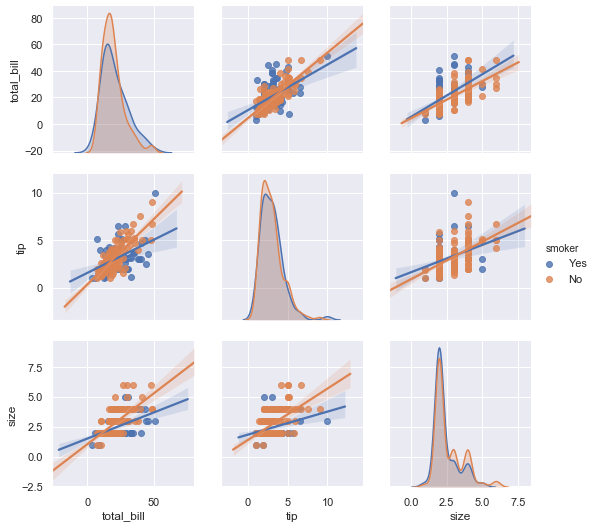

In [19]:
import seaborn as sns
tips = sns.load_dataset("tips")
g = sns.pairplot(tips,hue="smoker",kind='reg')
# Here I want to view the data with smoker v non smoker to see if visually I could find a notable difference in their tipping with regression line included 

What we can note from the graphs also that the tipping was v smiliar except for one outlier, a non smoker seems to have tip more than we would have expected from our previous calculations.

**Analysis of male v female diners**

Another area I feel that deserves investigation is the diner gender, and whether the gender had an impact on the tip size given.

In [22]:
tips4=tips.groupby('sex').sum() 
# grouping by females/males
tips4['percent'] = tips4['tip']/tips4['total_bill']*100 
# assigning the tip percentage

In [23]:
print(tips4)

        total_bill     tip  size    percent
sex                                        
Male       3256.82  485.07   413  14.893976
Female     1570.95  246.51   214  15.691779


Here we can also see that there is very little variation between the diners tip whether they were female or male. Again there was only a 1% difference with females tipping slightly more.

**Analysis of days and table size**

So then another issue that might influence the decision is the particular day that the meal took place.

In [24]:
tips5=tips.groupby(['day','size']).sum() 
# grouping by days and tables size 
tips5['percent'] = tips5['tip']/tips5['total_bill']*100 
# assigning the tip percentage
tips5.dropna()
# dropping the empty rows

total_bill     tip    percent
day  size                               
Thur 1          10.07    1.83  18.172790
     2         727.53  117.24  16.114799
     3          76.64   10.77  14.052714
     4         149.75   21.09  14.083472
     5          41.19    5.00  12.138869
     6          91.15   15.90  17.443774
Fri  1           8.58    1.92  22.377622
     2         261.15   42.31  16.201417
     3          15.98    3.00  18.773467
     4          40.17    4.73  11.774956
Sat  1          10.32    2.00  19.379845
     2         892.37  133.43  14.952318
     3         459.17   68.36  14.887732
     4         388.39   53.61  13.803136
     5          28.15    3.00  10.657194
Sun  2         684.84  109.86  16.041703
     3         332.76   46.81  14.067196
     4         480.39   73.58  15.316722
     5          81.00   12.14  14.987654
     6          48.17    5.00  10.379905

We can see that it appears when diners are alone they seem to tip more than the American 15% rule.

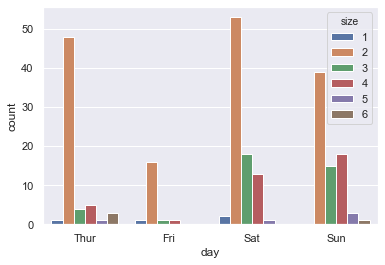

In [25]:
sns.countplot(x='day',hue='size',data=tips)

However, we can see that it more  common as seen before in the table above in tips 5  to have a table size of 2 as well as the barchart 

**Analysis of lunch v dinner**

Some of the meals were lunches while others were dinners, we might see if there were bigger tips  at lunch or dinner.

In [26]:

tips6=tips.groupby(['day','time']).sum() 
# grouping by days and tables size 
tips6['percent'] = tips6['tip']/tips6['total_bill']*100 
# assigning the tip percentage
tips6.dropna()
# dropping the empty rows

total_bill     tip   size    percent
day  time                                        
Thur Lunch      1077.55  168.83  150.0  15.667950
     Dinner       18.78    3.00    2.0  15.974441
Fri  Lunch        89.92   16.68   14.0  18.549822
     Dinner      235.96   35.28   26.0  14.951687
Sat  Dinner     1778.40  260.40  219.0  14.642375
Sun  Dinner     1627.16  247.39  216.0  15.203791

Here we can see Friday lunch seems to offer the best individual tips for the waiter, albeit as mentioned previously for very tables.

## **Regression**

Regression:
     Viewing the relationship between tips and total bill

We might look at the relationship that we know exists between tips and total bill and plot that to find a line of best fit where for any total bill we can predict an estimated tip.

Using a regression plot like implot or jointplot we can shown a line of best fit where total plot is on the x axis and tip on the y axis.The line of best fit here helps us predict a tip when given the total bill on the x axis.

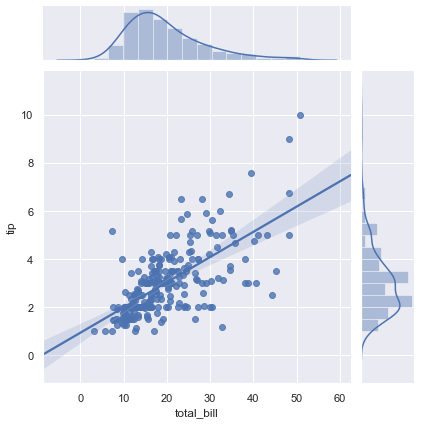

In [27]:
sns.jointplot(x ='total_bill', y ='tip', data=tips, kind='reg')
# We can plot the tip against the total bill, adapted from seaborn.pydata

Here we can see that their is a  positive  linear relationship between the tip and bill amount as expected.

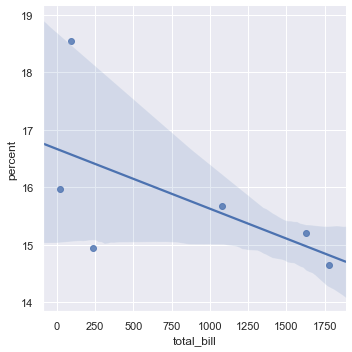

In [28]:
sns.lmplot(x ='total_bill', y ='percent', data=tips6)

However between tip percent and total bill  here , we see a weak negative correlation.

So, it seems that the bigger the bill, the more chance that clients will actually give slightly under the 15%, so they seem to round the tip down the greater the bill.

Also we might like to view the relationship between the days, tables size and tip per day .This also can be done with a regression graph 

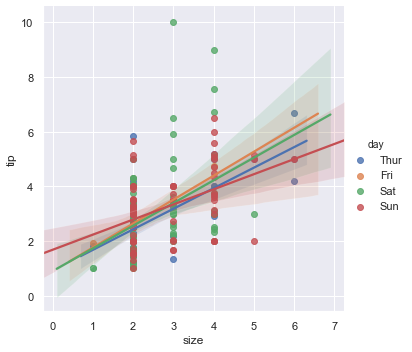

In [29]:
sns.lmplot(x = 'size',y = 'tip',data = tips,hue ='day')
# adapted from seaborn.pydata

The above graph would indicate that Friday has a slightly steep line of best fit, indicating that as our table size gets bigger a slightly bigger tip would be expected.

In [30]:
df = pd.read_csv("tips.csv")
# Here I felt as I wanted to do more on regression, I would read the csv file into a dataframe 
 # https://stackoverflow.com/questions/52359471/how-to-predict-a-value-using-pandas-data-frame

In [31]:
np.polyfit(df['total_bill'], df['tip'], 1) 
# Output is array with (m, c ) where y =mx +c, y is the tip predicted if x is the total bill amount # I elicit a polyfit set for m and c to create a line of best fit. 


array([0.10502452, 0.92026961])

In [32]:
print('''The line of best fit  is  y ={m:2f}*x + {c:2f}''')
# printing the line of best fit with the slope and constant

The line of best fit  is  y ={m:2f}*x + {c:2f}


In [33]:
b=input("To find the expected tip percentage amount Please enter the total bill  :  ")

To find the expected tip percentage amount Please enter the total bill  :   120.14


In [34]:
b= float()

In [35]:

# Catorgorising the input as floating number, as I will the bill should be to 2 decimal places

In [36]:
while b < 0:
        print("The value is negative try again")
print("The corresponding tip expected would be y =%m:2f%*b + %c:2f%")

The corresponding tip expected would be y =%m:2f%*b + %c:2f%


In [37]:
coeff, cov = np.polyfit(df['total_bill'], df['tip'], 1, cov=True)
# Here i could also elicit the regression line slope and constant , and also the covariance 

In [ ]:
print (coeff, cov)

Covariance measures the density of the relationship between variables.

In [38]:
 np.polyfit(df['total_bill'], df['tip']/df['total_bill']*100, 1) 
 

array([-0.23230243, 20.67658071])

These values represent the slope and constant of the linear relationship between total bill and the tip percent. 

In [39]:
c1=input("To find the expected tip percentage amount Please enter the total bill:    ")

To find the expected tip percentage amount Please enter the total bill:     12.10


In [40]:
c1= float()

In [41]:
while c1 < 0:
        print("The value is negative try again")
print("The corresponding tip percentage expected would be  =%m:2f%*c1 + %c:2f%")

The corresponding tip percentage expected would be  =%m:2f%*c1 + %c:2f%


In [ ]:
# polyval cold also have been used

Pearson correlation coefficients :

Correlation is a measure between -1 and +1. It shows the strength and direction of the linear relationship between 2 variables. Perfect positive correlation would be when the value of +1 is found, -1 shows perfect negative correlation, and 0 shows no correlation.

Previously in the notebook we used tips.corr() and saw that the correlation between tips and total bill was .675 fairly moderate positive  correlation and between table size and tip was .489 positive correlation so the number of table size is also a factor that positively influences the tip.

Conclusion:

The data is in general in line with our expectation, that is , that a 15% tip is given on meals in the US.  However from our data we saw that :


As expected the less tables the waiter had the more attentive he must have been and the greater the tip per table.

* Friday lunch tips were higher than all the others taken between Thursday and Sunday. 

* The most common table size was of two to three people.

* Women tipped 1% higher than men in our findings, so it appears both genders tip around the 15%.

* Also athough non smokers tipped about 1% higher than smokers in general, it shows that this amount is quite small and it has no real effect on tip size .

* Tip seems to get rounded down the greater the bill.

While the scope of our analysis is interesting and the finding above are surprising, it is questionable how transferable our findings are. 

There are issues with the relevance of the conclusions across different cultural backgrounds or countries. Different cultures have different protocols for tipping. In Ireland, for example we use a 10% gauge while in Spain it can be under 5%. Another issue that we are unsure of is if there was alcohol served in the restaurant, and this would also be an interesting variable to track and its affect on tip size.

Indeed, apart from whether alcohol was on the menu and and an effect on the different tips,other factors that we might need to know about is was Friday a payday for the lunching clients? Were they with work companions?, and if so do we pay a higher tip when socialising with work colleagues? Or, it is that,a different clientele comes to the restaurant on a Friday? 

 Comparion with other reviews:

I compared my working with https://github.com/delhiank762/Exploratory-Analysis-of-Tips-Dataset/blob/master/report-tipsdataset.pdf and I would disagree with some of the findings.While Shubham Dubey mentions that,the most common table size was 2, and max number of diners was Saturday at 87 and minimum at 16, she then suggests  men tipped more than women,I disagree with this ,following my findings above.Shubham Dubey also finds no relationship between tip and bill total, which I have shown to roughly be around 15%. 

I also compared my work with https://github.com/markcot/fundamentals-project and I felt that we follwed much the same approach, however I have not gone into detail with regard to the functions of different packages

References:
    

https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial

https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

https://medium.com/@mukul.mschauhan/data-visualisation-using-seaborn-464b7c0e5122

https://dicook.public.iastate.edu/stat503/05/cs-tips2.pdf

 https://github.com/delhiank762/Exploratory-Analysis-of-Tips-Dataset/blob/master/report-tipsdataset.pdf